<a href="https://colab.research.google.com/github/rigelfalcon/GoogleColab/blob/master/lstm_autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


From: https://machinelearningmastery.com/lstm-autoencoders/

In [0]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

[0.10485281 0.20066825 0.29959437 0.3999267  0.4993382  0.5985376
 0.69826764 0.79932195 0.9025682 ]


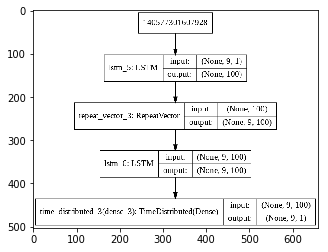

In [0]:
# lstm autoencoder recreate sequence
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.utils import plot_model
# define input sequence
sequence = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
# reshape input into [samples, timesteps, features]
n_in = len(sequence)
sequence = sequence.reshape((1, n_in, 1))
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_in,1)))
model.add(RepeatVector(n_in))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(sequence, sequence, epochs=300, verbose=0)
plot_model(model, show_shapes=True, to_file='reconstruct_lstm_autoencoder.png')
img=mpimg.imread('reconstruct_lstm_autoencoder.png')
imgplot = plt.imshow(img)
# demonstrate recreation
yhat = model.predict(sequence, verbose=0)
print(yhat[0,:,0])


[0.1654949  0.29052913 0.40411365 0.509343   0.60931647 0.7056261
 0.7994083  0.891678  ]


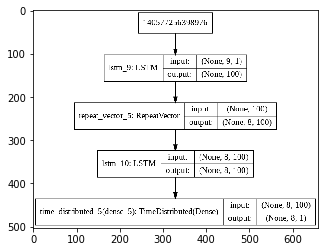

In [0]:
# lstm autoencoder predict sequence
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.utils import plot_model
# define input sequence
seq_in = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
# reshape input into [samples, timesteps, features]
n_in = len(seq_in)
seq_in = seq_in.reshape((1, n_in, 1))
# prepare output sequence
seq_out = seq_in[:, 1:, :]
n_out = n_in - 1
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_in,1)))
model.add(RepeatVector(n_out))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')
plot_model(model, show_shapes=True, to_file='predict_lstm_autoencoder.png')
img=mpimg.imread('predict_lstm_autoencoder.png')
imgplot = plt.imshow(img)
# fit model
model.fit(seq_in, seq_out, epochs=300, verbose=0)
# demonstrate prediction
yhat = model.predict(seq_in, verbose=0)
print(yhat[0,:,0])

[array([[[0.10730295],
        [0.20617147],
        [0.30367425],
        [0.40057048],
        [0.4976358 ],
        [0.5956873 ],
        [0.6956106 ],
        [0.79839146],
        [0.9051556 ]]], dtype=float32), array([[[0.17693494],
        [0.29966378],
        [0.40629044],
        [0.50431335],
        [0.59969527],
        [0.69683564],
        [0.79619634],
        [0.9018917 ]]], dtype=float32)]


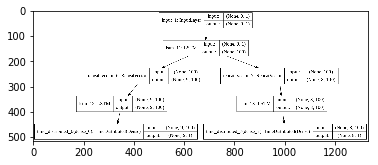

In [0]:
# lstm autoencoder reconstruct and predict sequence
from numpy import array
from keras.models import Model
from keras.layers import Input
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.utils import plot_model
# define input sequence
seq_in = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
# reshape input into [samples, timesteps, features]
n_in = len(seq_in)
seq_in = seq_in.reshape((1, n_in, 1))
# prepare output sequence
seq_out = seq_in[:, 1:, :]
n_out = n_in - 1
# define encoder
visible = Input(shape=(n_in,1))
encoder = LSTM(100, activation='relu')(visible)
# define reconstruct decoder
decoder1 = RepeatVector(n_in)(encoder)
decoder1 = LSTM(100, activation='relu', return_sequences=True)(decoder1)
decoder1 = TimeDistributed(Dense(1))(decoder1)
# define predict decoder
decoder2 = RepeatVector(n_out)(encoder)
decoder2 = LSTM(100, activation='relu', return_sequences=True)(decoder2)
decoder2 = TimeDistributed(Dense(1))(decoder2)
# tie it together
model = Model(inputs=visible, outputs=[decoder1, decoder2])
model.compile(optimizer='adam', loss='mse')
plot_model(model, show_shapes=True, to_file='composite_lstm_autoencoder.png')
img=mpimg.imread('composite_lstm_autoencoder.png')
imgplot = plt.imshow(img)
# fit model
model.fit(seq_in, [seq_in,seq_out], epochs=300, verbose=0)
# demonstrate prediction
yhat = model.predict(seq_in, verbose=0)
print(yhat)

In [0]:
import numpy as np
from keras.models import Model
from keras.layers import Input
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.utils import plot_model
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


Using TensorFlow backend.


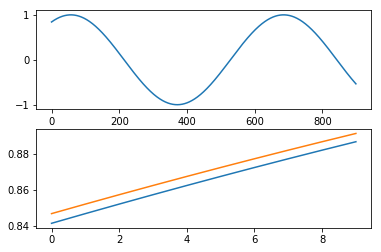

In [0]:
#%% generate data
#generate sin(x)
def SeriesGen(N):
  x=np.arange(1,N,0.01)
  return np.sin(x)
#use generated sin(x) to generate sample.
#input:x,x+1,x+2... 
#output:x+2,x+3,x+4...
def TrainDataGen(seq,k):
  dat=list()
  L=len(seq)
  for i in range(L-k-1):
    indat=seq[i:i+k]
    outdat=seq[i+1:i+k+1]
    dat.append((indat,outdat))
  return dat

y = SeriesGen(10)
dat = TrainDataGen(y, 10)
plt.figure(1)
##integral
plt.subplot(211)
plt.plot(y)
##local
plt.subplot(212)
plt.plot(dat[0][0])
plt.plot(dat[0][1])

In [0]:
# define input sequence
seq_in = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
#seq_in =


# reshape input into [samples, timesteps, features]
n_in = len(seq_in)
seq_in = seq_in.reshape((1, n_in, 1))
# prepare output sequence
seq_out = seq_in[:, 1:, :]
n_out = n_in - 1


Using TensorFlow backend.


45


AttributeError: ignored

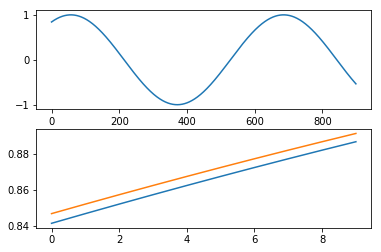

In [0]:
# -*- coding: utf-8 -*-
"""
Created on Fri Apr 12 16:34:29 2019

@author: Rigel
"""
#
#from keras.models import Sequential
#from keras.layers import Dense


#
#
##%%
#model = Sequential([Dense(2, input_dim=1), Dense(1)])
##or
##model = Sequential()
##model.add(Dense(2, input_dim=1))
##model.add(Dense(1))
#
##%%
#from keras.layers import Input
#visible = Input(shape=(2,))
#
#
##%%
#from keras.layers import Input
#from keras.layers import Dense
#visible = Input(shape=(2,))
#hidden = Dense(2)(visible)





#
##%% Multilayer Perceptron
#from keras.utils import plot_model
#from keras.models import Model
#from keras.layers import Input
#from keras.layers import Dense
#visible = Input(shape=(10,))
#hidden1 = Dense(10, activation='relu')(visible)
#hidden2 = Dense(20, activation='relu')(hidden1)
#hidden3 = Dense(10, activation='relu')(hidden2)
#output = Dense(1, activation='sigmoid')(hidden3)
#model = Model(inputs=visible, outputs=output)
## summarize layers
#print(model.summary())
## plot graph
#plot_model(model, to_file='multilayer_perceptron_graph.png')
#
#
#
#%%
import numpy as np
from keras.models import Model
from keras.layers import Input
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.utils import plot_model
#%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


#%% generate data
#generate sin(x)
def SeriesGen(N):
  x=np.arange(1,N,0.01)
  return np.sin(x)
#use generated sin(x) to generate sample.
#input:x,x+1,x+2... 
#output:x+2,x+3,x+4...
def TrainDataGen(seq,k):
  L=len(seq)
  gap=20
  data_size=np.int(np.ceil((L-k-1)/gap))
  print(data_size)
  indat=np.zeros((data_size,k),np.float64)
  outdat=np.zeros((data_size,k),np.float64)
  indat_list = list()
  outdat_list=list()
  for i in range(0,data_size):
#    indat[i,:]=seq[i*gap:i*gap+k]
#    outdat[i,:]=seq[i*gap+1:i*gap+k+1]
    indat=seq[i*gap:i*gap+k]
    outdat=seq[i*gap+1:i*gap+k+1]
#    print(i)
    indat_list.append((indat))
    outdat_list.append((outdat))
#  return indat, outdat
  return indat_list, outdat_list

#y = SeriesGen(10)
#[seq_in,seq_out] = TrainDataGen(y, 10)
#plt.figure(1)
###integral
#plt.subplot(211)
#plt.plot(y)
###local
#plt.subplot(212)
#plt.plot(seq_in[0][:])
#plt.plot(seq_out[0][:])
## reshape input to be 3D [samples, timesteps, features]
#n_in=seq_in.shape
#n_out=seq_out.shape
#seq_in=seq_in.reshape((n_in[0], n_in[1],1))
#seq_out = seq_out.reshape((n_out[0], n_out[1] ,1))
##
#n_in=seq_in.shape
#n_out=seq_out.shape
    

y = SeriesGen(10)
[seq_in,seq_out] = TrainDataGen(y, 10)
plt.figure(1)
##integral
plt.subplot(211)
plt.plot(y)
##local
plt.subplot(212)
plt.plot(seq_in[0][:])
plt.plot(seq_out[0][:])
## reshape input to be 3D [samples, timesteps, features]
n_in=seq_in.shape
n_out=seq_out.shape
seq_in=seq_in.reshape((n_in[0], n_in[1],1))
seq_out = seq_out.reshape((n_out[0], n_out[1] ,1))
#seq_in=seq_in.numpy()
#seq_out = seq_out.numpy()
seq_in = numpy.array(seq_in)
seq_out=numpy.array(seq_out)
##
n_in=seq_in.shape
n_out=seq_out.shape

#%%
num_unit=100
# define encoder
#visible = Input(shape=(20,n_in[1],1))
visible = Input(shape=(n_in[1],1))
encoder = LSTM(num_unit, activation='relu')(visible)
# define reconstruct decoder
decoder1 = RepeatVector(n_in[1])(encoder)
decoder1 = LSTM(num_unit, activation='relu', return_sequences=True)(decoder1)
decoder1 = TimeDistributed(Dense(1))(decoder1)
# define predict decoder
decoder2 = RepeatVector(n_out[1])(encoder)
decoder2 = LSTM(num_unit, activation='relu', return_sequences=True)(decoder2)
decoder2 = TimeDistributed(Dense(1))(decoder2)
# tie it together
model = Model(inputs=visible, outputs=[decoder1, decoder2])
model.compile(optimizer='adam', loss='mse')
plot_model(model, show_shapes=True, to_file='lstm_autoencoder.png')
img=mpimg.imread('lstm_autoencoder.png')
imgplot = plt.imshow(img)
#%%
# fit model
model.fit(seq_in, [seq_in,seq_out], batch_size=45, epochs=300, verbose=2)
#%%
loss=model.evaluate(x=seq_in, y=[seq_in,seq_out],verbose=1)
#%%
# demonstrate prediction
#yhat = model.predict(seq_in[0,:,0].reshape(1,n_out[1],1),verbose=2)
yhat = model.predict(seq_in,verbose=2)

#print(yhat)

#%%
plt.subplot(211)
plt.plot(yhat[0][0,:,0])
plt.plot(seq_in[0,:,0])
plt.legend(['reconstruct','raw'])
plt.subplot(212)
plt.plot(yhat[1][0,:,0])
plt.plot(seq_out[0,:,0])
plt.legend(['predict','real predict'])






#%%




# lstm autoencoder reconstruct and predict sequence
from numpy import array
from keras.models import Model
from keras.layers import Input
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.utils import plot_model
# define input sequence
seq_in = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
# reshape input into [samples, timesteps, features]
n_in = len(seq_in)
seq_in = seq_in.reshape((1, n_in, 1))
# prepare output sequence
seq_out = seq_in[:, 1:, :]
n_out = n_in - 1
# define encoder
visible = Input(shape=(n_in,1))
encoder = LSTM(100, activation='relu')(visible)
# define reconstruct decoder
decoder1 = RepeatVector(n_in)(encoder)
decoder1 = LSTM(100, activation='relu', return_sequences=True)(decoder1)
decoder1 = TimeDistributed(Dense(1))(decoder1)
# define predict decoder
decoder2 = RepeatVector(n_out)(encoder)
decoder2 = LSTM(100, activation='relu', return_sequences=True)(decoder2)
decoder2 = TimeDistributed(Dense(1))(decoder2)
# tie it together
model = Model(inputs=visible, outputs=[decoder1, decoder2])
model.compile(optimizer='adam', loss='mse')
plot_model(model, show_shapes=True, to_file='composite_lstm_autoencoder.png')
img=mpimg.imread('composite_lstm_autoencoder.png')
imgplot = plt.imshow(img)
# fit model
model.fit(seq_in, [seq_in,seq_out], epochs=300, verbose=0)
# demonstrate prediction
yhat = model.predict(seq_in, verbose=0)
print(yhat)























































In [0]:
# -*- coding: utf-8 -*-
"""
Created on Fri Apr 12 16:34:29 2019

@author: Rigel
"""
#
#from keras.models import Sequential
#from keras.layers import Dense


#
#
##%%
#model = Sequential([Dense(2, input_dim=1), Dense(1)])
##or
##model = Sequential()
##model.add(Dense(2, input_dim=1))
##model.add(Dense(1))
#
##%%
#from keras.layers import Input
#visible = Input(shape=(2,))
#
#
##%%
#from keras.layers import Input
#from keras.layers import Dense
#visible = Input(shape=(2,))
#hidden = Dense(2)(visible)





#
##%% Multilayer Perceptron
#from keras.utils import plot_model
#from keras.models import Model
#from keras.layers import Input
#from keras.layers import Dense
#visible = Input(shape=(10,))
#hidden1 = Dense(10, activation='relu')(visible)
#hidden2 = Dense(20, activation='relu')(hidden1)
#hidden3 = Dense(10, activation='relu')(hidden2)
#output = Dense(1, activation='sigmoid')(hidden3)
#model = Model(inputs=visible, outputs=output)
## summarize layers
#print(model.summary())
## plot graph
#plot_model(model, to_file='multilayer_perceptron_graph.png')
#
#
#
#%%
import numpy as np
from keras.models import Model
from keras.layers import Input
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.utils import plot_model
#%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


#%% generate data
#generate sin(x)
def SeriesGen(N):
  x=np.arange(1,N,0.01)
  return np.sin(x)
#use generated sin(x) to generate sample.
#input:x,x+1,x+2... 
#output:x+2,x+3,x+4...
def TrainDataGen(seq,k):
  L=len(seq)
  gap=20
  data_size=np.int(np.ceil((L-k-1)/gap))
  print(data_size)
  indat=np.zeros((data_size,k),np.float64)
  outdat=np.zeros((data_size,k),np.float64)
  indat_list = list()
  outdat_list=list()
  for i in range(0,data_size):
#    indat[i,:]=seq[i*gap:i*gap+k]
#    outdat[i,:]=seq[i*gap+1:i*gap+k+1]
    indat=seq[i*gap:i*gap+k]
    outdat=seq[i*gap+1:i*gap+k+1]
#    print(i)
    indat_list.append((indat))
    outdat_list.append((outdat))
#  return indat, outdat
  return indat_list, outdat_list

#y = SeriesGen(10)
#[seq_in,seq_out] = TrainDataGen(y, 10)
#plt.figure(1)
###integral
#plt.subplot(211)
#plt.plot(y)
###local
#plt.subplot(212)
#plt.plot(seq_in[0][:])
#plt.plot(seq_out[0][:])
## reshape input to be 3D [samples, timesteps, features]
#n_in=seq_in.shape
#n_out=seq_out.shape
#seq_in=seq_in.reshape((n_in[0], n_in[1],1))
#seq_out = seq_out.reshape((n_out[0], n_out[1] ,1))
##
#n_in=seq_in.shape
#n_out=seq_out.shape
    

y = SeriesGen(10)
[seq_in,seq_out] = TrainDataGen(y, 10)
plt.figure(1)
##integral
plt.subplot(211)
plt.plot(y)
##local
plt.subplot(212)
plt.plot(seq_in[0][:])
plt.plot(seq_out[0][:])
## reshape input to be 3D [samples, timesteps, features]
n_in=seq_in.shape
n_out=seq_out.shape
seq_in=seq_in.reshape((n_in[0], n_in[1],1))
seq_out = seq_out.reshape((n_out[0], n_out[1] ,1))
#seq_in=seq_in.numpy()
#seq_out = seq_out.numpy()
seq_in = numpy.array(seq_in)
seq_out=numpy.array(seq_out)
##
n_in=seq_in.shape
n_out=seq_out.shape

#%%
num_unit=100
# define encoder
#visible = Input(shape=(20,n_in[1],1))
visible = Input(shape=(n_in[1],1))
encoder = LSTM(num_unit, activation='relu')(visible)
# define reconstruct decoder
decoder1 = RepeatVector(n_in[1])(encoder)
decoder1 = LSTM(num_unit, activation='relu', return_sequences=True)(decoder1)
decoder1 = TimeDistributed(Dense(1))(decoder1)
# define predict decoder
decoder2 = RepeatVector(n_out[1])(encoder)
decoder2 = LSTM(num_unit, activation='relu', return_sequences=True)(decoder2)
decoder2 = TimeDistributed(Dense(1))(decoder2)
# tie it together
model = Model(inputs=visible, outputs=[decoder1, decoder2])
model.compile(optimizer='adam', loss='mse')
plot_model(model, show_shapes=True, to_file='lstm_autoencoder.png')
img=mpimg.imread('lstm_autoencoder.png')
imgplot = plt.imshow(img)
#%%
# fit model
model.fit(seq_in, [seq_in,seq_out], batch_size=45, epochs=300, verbose=2)
#%%
loss=model.evaluate(x=seq_in, y=[seq_in,seq_out],verbose=1)
#%%
# demonstrate prediction
#yhat = model.predict(seq_in[0,:,0].reshape(1,n_out[1],1),verbose=2)
yhat = model.predict(seq_in,verbose=2)

#print(yhat)

#%%
plt.subplot(211)
plt.plot(yhat[0][0,:,0])
plt.plot(seq_in[0,:,0])
plt.legend(['reconstruct','raw'])
plt.subplot(212)
plt.plot(yhat[1][0,:,0])
plt.plot(seq_out[0,:,0])
plt.legend(['predict','real predict'])






#%%




# lstm autoencoder reconstruct and predict sequence
from numpy import array
from keras.models import Model
from keras.layers import Input
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.utils import plot_model
# define input sequence
seq_in = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
# reshape input into [samples, timesteps, features]
n_in = len(seq_in)
seq_in = seq_in.reshape((1, n_in, 1))
# prepare output sequence
seq_out = seq_in[:, 1:, :]
n_out = n_in - 1
# define encoder
visible = Input(shape=(n_in,1))
encoder = LSTM(100, activation='relu')(visible)
# define reconstruct decoder
decoder1 = RepeatVector(n_in)(encoder)
decoder1 = LSTM(100, activation='relu', return_sequences=True)(decoder1)
decoder1 = TimeDistributed(Dense(1))(decoder1)
# define predict decoder
decoder2 = RepeatVector(n_out)(encoder)
decoder2 = LSTM(100, activation='relu', return_sequences=True)(decoder2)
decoder2 = TimeDistributed(Dense(1))(decoder2)
# tie it together
model = Model(inputs=visible, outputs=[decoder1, decoder2])
model.compile(optimizer='adam', loss='mse')
plot_model(model, show_shapes=True, to_file='composite_lstm_autoencoder.png')
img=mpimg.imread('composite_lstm_autoencoder.png')
imgplot = plt.imshow(img)
# fit model
model.fit(seq_in, [seq_in,seq_out], epochs=300, verbose=0)
# demonstrate prediction
yhat = model.predict(seq_in, verbose=0)
print(yhat)























































In [0]:
#%%
import numpy as np
from keras.models import Model
from keras.layers import Input
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.utils import plot_model
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


490


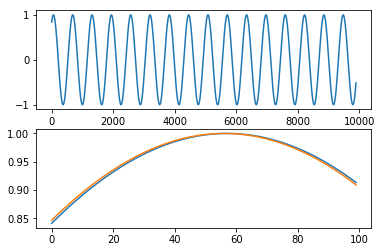

In [19]:


#%% generate data
#generate sin(x)
def SeriesGen(N):
  x=np.arange(1,N,0.01)
  return np.sin(x)
#use generated sin(x) to generate sample.
#input:x,x+1,x+2... 
#output:x+2,x+3,x+4...
def TrainDataGen(seq,k):
  L=len(seq)
  gap=20
  data_size=np.int(np.ceil((L-k-1)/gap))
  print(data_size)
  indat=np.zeros((data_size,k),np.float64)
  outdat=np.zeros((data_size,k),np.float64)
  indat_list = list()
  outdat_list=list()
  for i in range(0,data_size):
    indat=seq[i*gap:i*gap+k]
    outdat=seq[i*gap+1:i*gap+k+1]
    indat_list.append((indat))
    outdat_list.append((outdat))
  indat_list = np.array(indat_list, dtype=np.float32)
  outdat_list = np.array(outdat_list, dtype=np.float32)
  return indat_list, outdat_list

#y = SeriesGen(10)
#[seq_in,seq_out] = TrainDataGen(y, 10)
#plt.figure(1)
###integral
#plt.subplot(211)
#plt.plot(y)
###local
#plt.subplot(212)
#plt.plot(seq_in[0][:])
#plt.plot(seq_out[0][:])
## reshape input to be 3D [samples, timesteps, features]
#n_in=seq_in.shape
#n_out=seq_out.shape
#seq_in=seq_in.reshape((n_in[0], n_in[1],1))
#seq_out = seq_out.reshape((n_out[0], n_out[1] ,1))
##
#n_in=seq_in.shape
#n_out=seq_out.shape
    

y = SeriesGen(100)
[seq_in,seq_out] = TrainDataGen(y, 100)
plt.figure(1)
##integral
plt.subplot(211)
plt.plot(y)
##local
plt.subplot(212)
plt.plot(seq_in[0][:])
plt.plot(seq_out[0][:])
## reshape input to be 3D [samples, timesteps, features]
n_in=seq_in.shape
n_out=seq_out.shape
seq_in=seq_in.reshape((n_in[0], n_in[1],1))
seq_out = seq_out.reshape((n_out[0], n_out[1] ,1))
#seq_in=seq_in.numpy()
#seq_out = seq_out.numpy()
seq_in = np.array(seq_in)
seq_out=np.array(seq_out)
##
n_in=seq_in.shape
n_out=seq_out.shape



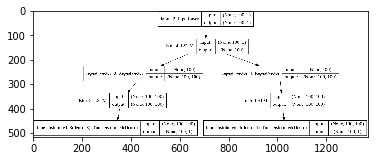

In [20]:
#%%
num_unit=100
# define encoder
#visible = Input(shape=(20,n_in[1],1))
visible = Input(shape=(n_in[1],1))
encoder = LSTM(num_unit, activation='relu')(visible)
# define reconstruct decoder
decoder1 = RepeatVector(n_in[1])(encoder)
decoder1 = LSTM(num_unit, activation='relu', return_sequences=True)(decoder1)
decoder1 = TimeDistributed(Dense(1))(decoder1)
# define predict decoder
decoder2 = RepeatVector(n_out[1])(encoder)
decoder2 = LSTM(num_unit, activation='relu', return_sequences=True)(decoder2)
decoder2 = TimeDistributed(Dense(1))(decoder2)
# tie it together
model = Model(inputs=visible, outputs=[decoder1, decoder2])
model.compile(optimizer='adam', loss='mse')
plot_model(model, show_shapes=True, to_file='lstm_autoencoder.png')
img=mpimg.imread('lstm_autoencoder.png')
imgplot = plt.imshow(img)

In [21]:
#%%
# fit model
model.fit(seq_in, [seq_in,seq_out], batch_size=45, epochs=300, verbose=2)


Epoch 1/300
 - 8s - loss: 0.7528 - time_distributed_3_loss: 0.3812 - time_distributed_4_loss: 0.3715
Epoch 2/300
 - 6s - loss: 0.2859 - time_distributed_3_loss: 0.1483 - time_distributed_4_loss: 0.1376
Epoch 3/300


KeyboardInterrupt: ignored

45/45 [==============================] - 0s 474us/step
[0.0009060719697218802, 0.0004614875115092016, 0.00044458449119701984]
[[[0.84147096]
  [0.84683186]
  [0.852108  ]
  [0.857299  ]
  [0.8624042 ]
  [0.86742324]
  [0.87235546]
  [0.8772005 ]
  [0.8819578 ]
  [0.8866269 ]]]
[[[0.84683186]
  [0.852108  ]
  [0.857299  ]
  [0.8624042 ]
  [0.86742324]
  [0.87235546]
  [0.8772005 ]
  [0.8819578 ]
  [0.8866269 ]
  [0.89120734]]]
[array([[[0.8468423 ],
        [0.8686106 ],
        [0.8673802 ],
        [0.86642486],
        [0.8672329 ],
        [0.86761594],
        [0.8670548 ],
        [0.86547166],
        [0.8633268 ],
        [0.8610255 ]]], dtype=float32), array([[[0.8448387 ],
        [0.87178093],
        [0.8609133 ],
        [0.86462545],
        [0.86460525],
        [0.8626026 ],
        [0.8607877 ],
        [0.85991436],
        [0.85999215],
        [0.86075497]]], dtype=float32)]


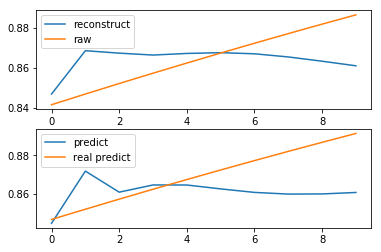

In [18]:
#%%
loss=model.evaluate(x=seq_in, y=[seq_in,seq_out],verbose=1)
print(loss)
#%%
# demonstrate prediction
#yhat = model.predict(seq_in[0,:,0].reshape(1,n_out[1],1),verbose=2)
yhat = model.predict(seq_in[0].reshape(1,n_in[1],1),verbose=2)
print(seq_in[0].reshape(1,n_in[1],1))
print(seq_out[0].reshape(1,n_out[1],1))


print(yhat)

#%%
plt.subplot(211)
plt.plot(yhat[0][0,:,0])
plt.plot(seq_in[0])
plt.legend(['reconstruct','raw'])
plt.subplot(212)
plt.plot(yhat[1][0,:,0])
plt.plot(seq_out[0])
plt.legend(['predict','real predict'])

